<a href="https://colab.research.google.com/github/gaurav123-sys/E_commerce_EDA/blob/main/Gaurav%20assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan


In [6]:
from google.colab import files
uploaded = files.upload()



Saving tips (data for regression problem).csv to tips (data for regression problem).csv


In [7]:
tips = pd.read_csv('tips (data for regression problem).csv')

In [8]:
tips.describe()



,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [9]:
print(tips.isnull().sum())



total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [10]:
Q1 = tips['tip'].quantile(0.25)
Q3 = tips['tip'].quantile(0.75)
IQR = Q3 - Q1
tips = tips[(tips['tip'] >= (Q1 - 1.5 * IQR)) & (tips['tip'] <= (Q3 + 1.5 * IQR))]

In [11]:
tips



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


TO SPLIT THE DATA

Scatter plot between 'total_bill' and 'tip'

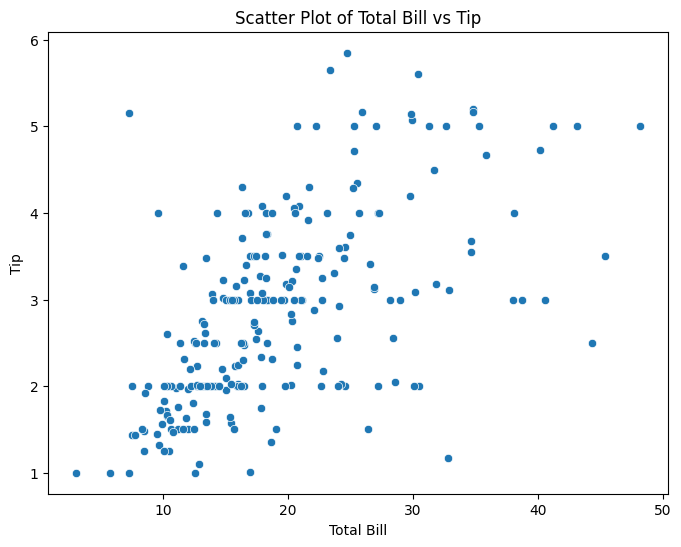

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.title('Scatter Plot of Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()


Pair plot

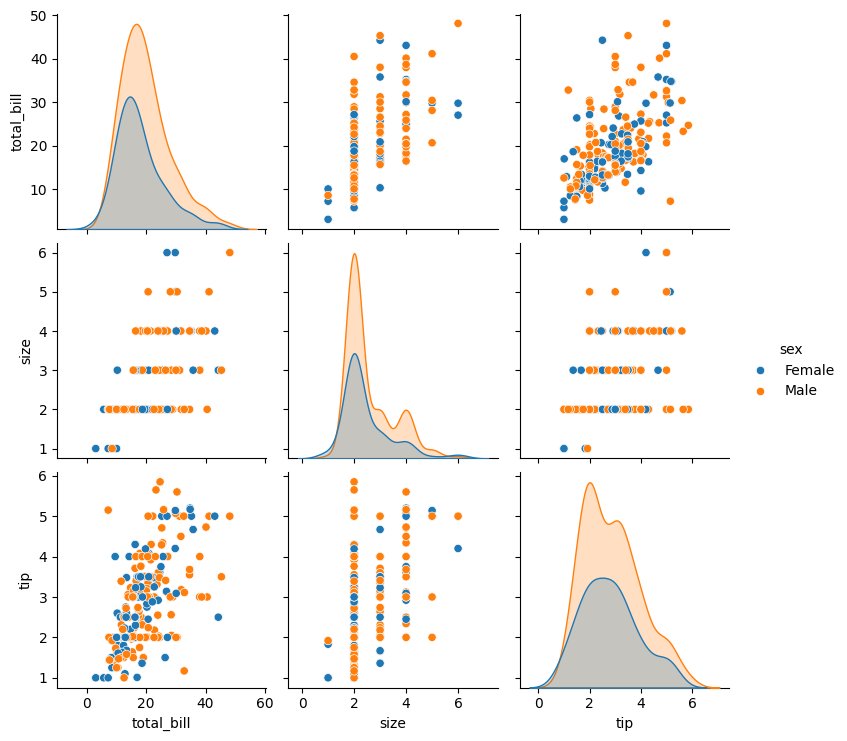

In [13]:
sns.pairplot(tips, vars=['total_bill', 'size', 'tip'], hue='sex')  # You can adjust the variables
plt.show()

Correlation matrix

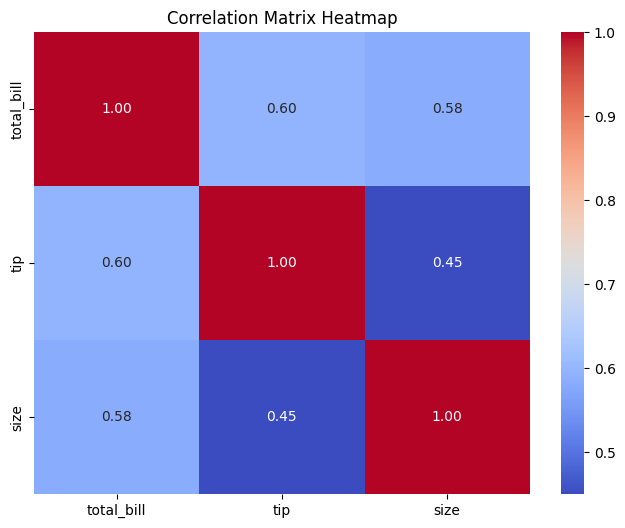

In [14]:
corr_matrix = tips[['total_bill', 'tip', 'size']].corr()

# Display heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     68.28
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           4.79e-24
Time:                        16:26:38   Log-Likelihood:                -301.04
No. Observations:                 235   AIC:                             608.1
Df Residuals:                     232   BIC:                             618.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0647      0.176      6.066      0.0

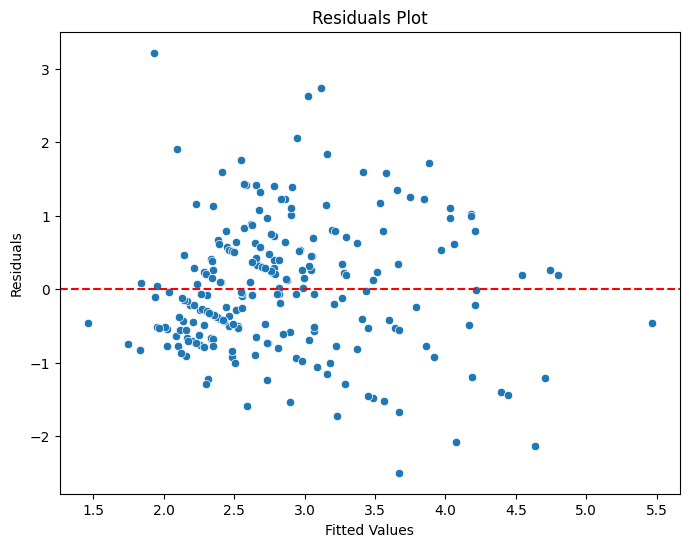

In [15]:
import statsmodels.api as sm

# Prepare data
X = tips[['total_bill', 'size']]  # Select features
X = sm.add_constant(X)  # Add intercept
y = tips['tip']

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression model
print(model.summary())

# Plot residuals to visually inspect linearity assumption
residuals = model.resid
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [18]:
# One-hot encode categorical columns: 'sex', 'smoker', 'day', 'time'
tips_encoded = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time','size']).astype(float)

# Display the updated DataFrame with one-hot encoded columns
tips_encoded

,total_bill,tip,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,size_1,size_2,size_3,size_4,size_5,size_6
0,16.99,1.01,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10.34,1.66,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,21.01,3.50,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,23.68,3.31,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,24.59,3.61,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,35.83,4.67,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
240,27.18,2.00,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
241,22.67,2.00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
242,17.82,1.75,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
x= tips_encoded.drop('tip',axis=1)
y= tips_encoded.tip

In [20]:
m= x.total_bill.mean()
sd= x.total_bill.std()
x.total_bill= (x.total_bill-m)/sd

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

LINEAR REGRESSION

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred_lin = lin_reg.predict(X_test)

# Evaluate
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print(f"Linear Regression MSE: {mse_lin}, R2: {r2_lin}")

Linear Regression MSE: 0.6699768053925254, R2: 0.4088141155835766


Initialize Lasso Regression

In [24]:
from sklearn.linear_model import Lasso

# Initialize Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso.predict(X_test)

# Evaluate
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso}, R2: {r2_lasso}")

Lasso Regression MSE: 0.7366040336646449, R2: 0.35002241331085293


Decision Tree Regression

In [25]:
from sklearn.tree import DecisionTreeRegressor


dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluate
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree Regression MSE: {mse_dt}, R2: {r2_dt}")

Decision Tree Regression MSE: 1.467157446808511, R2: -0.29461612071997245


Initialize Random Forest Regression

In [26]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}, R2: {r2_rf}")

Random Forest MSE: 0.6250928493617021, R2: 0.44841960793587377


In [27]:
from sklearn.svm import SVR

# Initialize Support Vector Regression
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predictions
y_pred_svr = svr.predict(X_test)

# Evaluate
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR MSE: {mse_svr}, R2: {r2_svr}")

SVR MSE: 0.5486779049890824, R2: 0.5158479668103151


In [28]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize KNN Regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)

# Evaluate
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNN Regression MSE: {mse_knn}, R2: {r2_knn}")

KNN Regression MSE: 0.7033842553191488, R2: 0.37933546397653006


# Best Model:
**Support Vector Regression (SVR) emerges as the best model in this set, with the highest R² (0.516) and lowest MSE (0.549) among the models tested. While still not a perfect fit, SVR captures the relationship in the data better than the other models, making it the best choice in this scenario.**